In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/IRIS.csv')

In [3]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


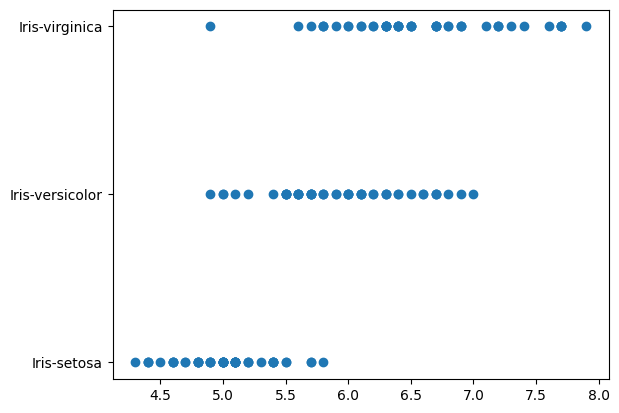

In [10]:
plt.scatter(df[['sepal_length']],df['species'])

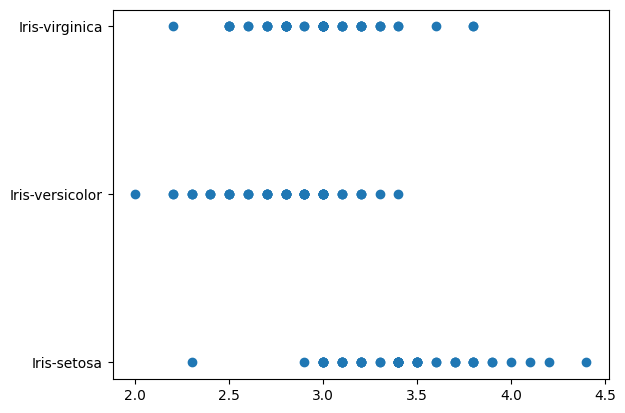

In [11]:
plt.scatter(df[['sepal_width']],df['species'])

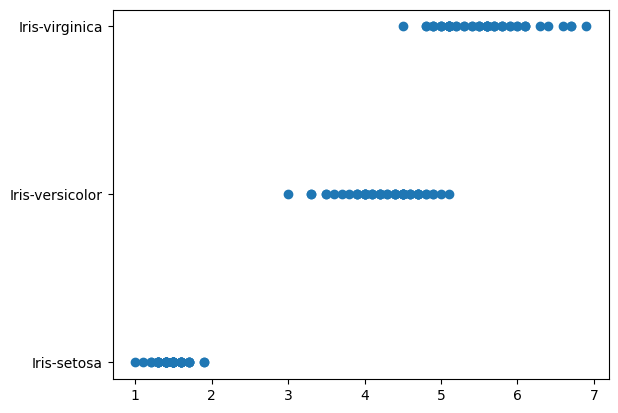

In [12]:
plt.scatter(df[['petal_length']],df['species'])

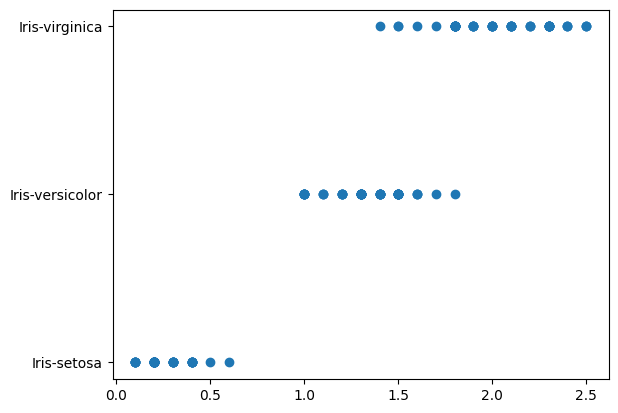

In [13]:
plt.scatter(df[['petal_width']],df['species'])

In [15]:
x=df.drop(['species'],axis=1)
y=df['species']
y =y.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [16]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
tf.random.set_seed(40)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 output classes (Iris Setosa, Versicolor, Virginica)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_test, y_test))


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3944 - loss: 1.1388 - val_accuracy: 0.3667 - val_loss: 0.9811
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5032 - loss: 1.0019 - val_accuracy: 0.7000 - val_loss: 0.8312
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7192 - loss: 0.8451 - val_accuracy: 0.9667 - val_loss: 0.7256
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9300 - loss: 0.7242 - val_accuracy: 0.8000 - val_loss: 0.6281
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7973 - loss: 0.6494 - val_accuracy: 0.8667 - val_loss: 0.5579
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8931 - loss: 0.5822 - val_accuracy: 0.9000 - val_loss: 0.5056
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9212 - loss: 0.5309 - val_accuracy: 0.9333 - val_loss: 0.4647
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9212 - loss: 0.4917 - val_accuracy: 0.9667 - val_loss

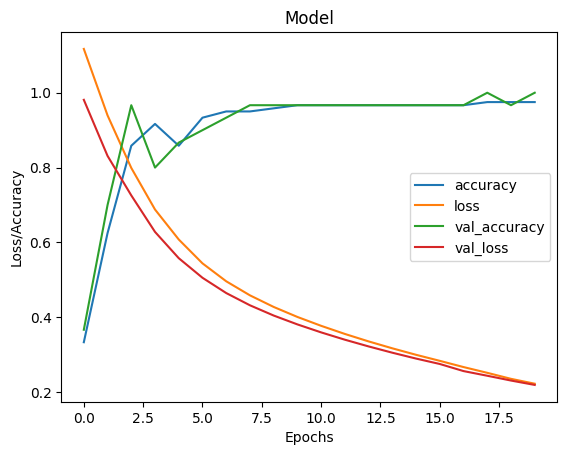

In [25]:
pd.DataFrame(history.history).plot()
plt.title('Model')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.show()

In [26]:
model.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 1.0000 - loss: 0.2192


[0.2192423790693283, 1.0]